In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng 

In [2]:
# Original Model 

def original(buyers, resellers, face_value, num_sim):

    avg_payoffs = []
    num_buyers = []
    
    for n in range(num_sim):
        buyer_values = rng.randint(face_value, face_value + 601, buyers) 
        reseller_values = rng.randint(face_value + 300, face_value + 901, resellers)
        reseller_payoffs = []
        i = 0
        j = 0
        while i < len(buyer_values):
            for j in range(len(reseller_values)):
                if buyer_values[i] >= reseller_values[j]:
                    reseller_payoffs.append(buyer_values[i] - face_value)
                    
                    buyer_values = np.delete(buyer_values, i)
                    reseller_values = np.delete(reseller_values, j)
                    
                    i -= 1
                    break  
            i += 1
        
        if len(reseller_values) > 0:
            for i in range(len(reseller_values)):
                reseller_payoffs.append(0 - face_value)
                    
        avg_payoffs.append(np.sum(reseller_payoffs) / resellers)
        num_buyers.append(len(buyer_values))
        
    return avg_payoffs, num_buyers


In [3]:
# Proposed Model 

def proposed(buyers, resellers, face_value, num_sim):
    
    avg_payoffs = []
    num_buyers = []
    
    for n in range(num_sim):
        buyer_values = rng.randint(face_value, face_value + 601, buyers)
        buyer_values = np.sort(buyer_values)
        reseller_values = rng.randint(face_value + 300, face_value + 901, resellers)
        reseller_payoffs = []
        i = 0
        while i < len(buyer_values) and len(reseller_values) != 0:
            if len(buyer_values) == 1:
                reseller_payoffs.append(buyer_values[i] - face_value)
                buyer_values = np.delete(buyer_values, i)
                reseller_values = np.delete(reseller_values, 0)
            else:
                curr_size = len(buyer_values)
                reseller_payoffs.append(buyer_values[curr_size - 2] - face_value)
                
                buyer_values = np.delete(buyer_values, curr_size - 1)
                reseller_values = np.delete(reseller_values, 0)
                    
        avg_payoffs.append(np.sum(reseller_payoffs) / resellers)
        num_buyers.append(len(buyer_values))
        
    return avg_payoffs, num_buyers


Average Original Model Payoffs: 27.933449999999997
Average Proposed Model Payoffs: 377.7303

Difference in Model Payoffs: 349.79685

Average Original Model Buyers Left: 21.696
Average Proposed Model Buyers Left: 10.0


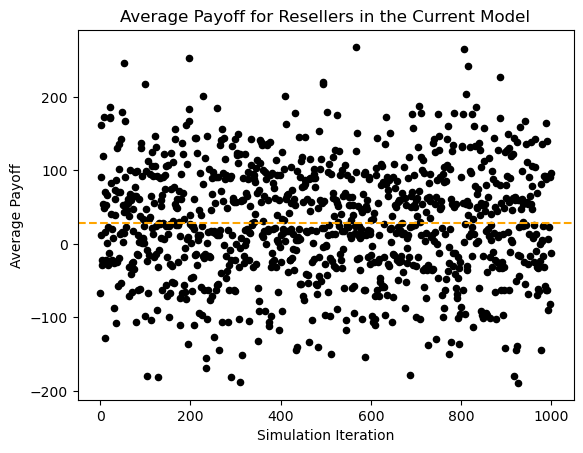

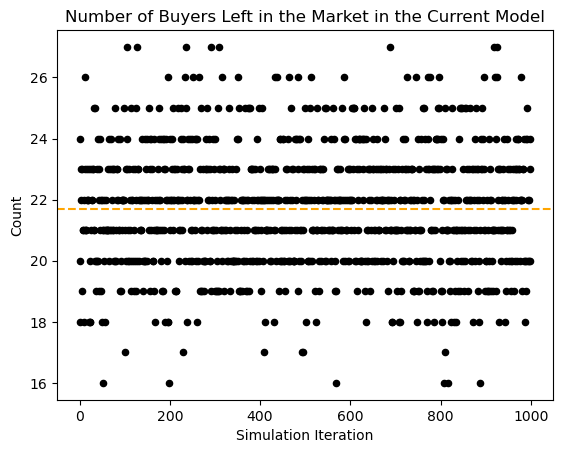

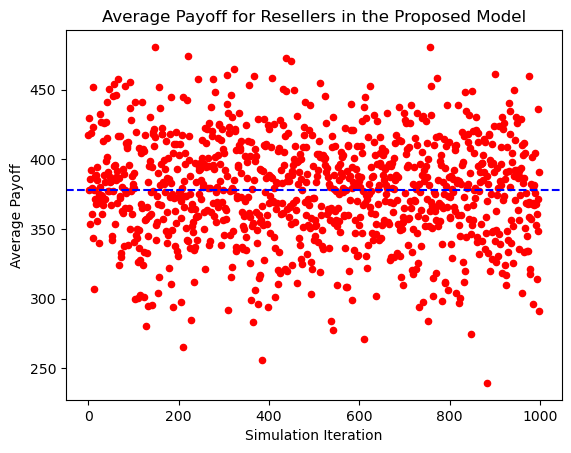

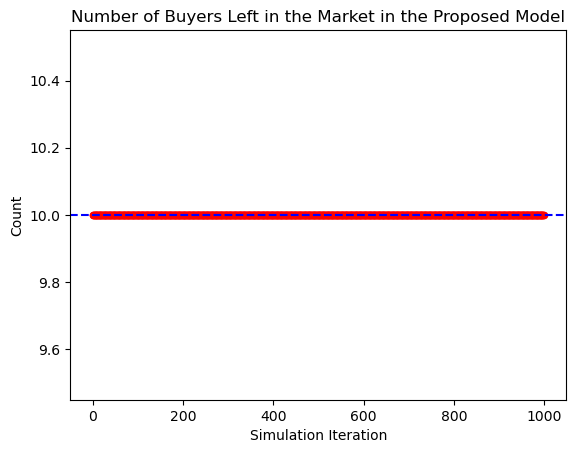

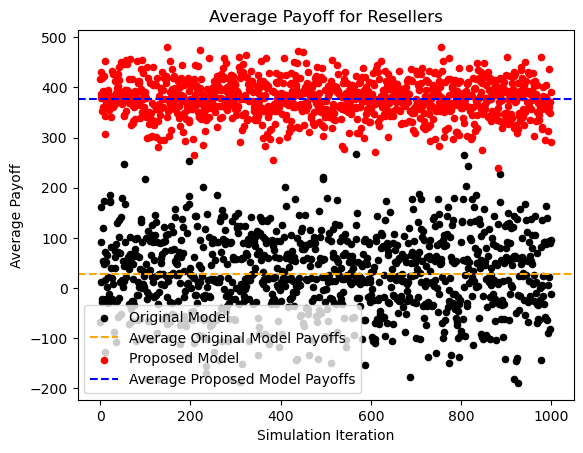

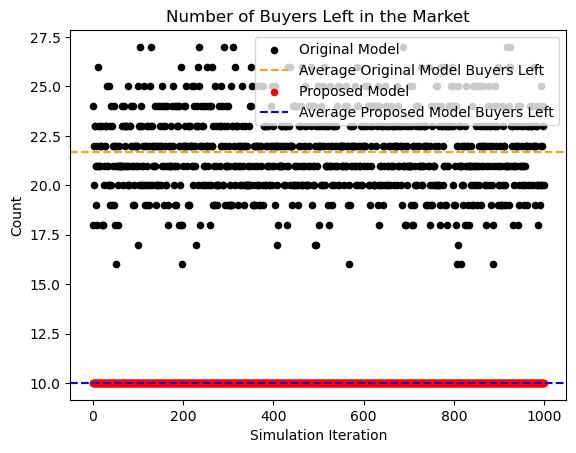

In [7]:
# Parameters

face_value = 300
buyers = 30
resellers = 20
num_sim = 1000

# Results

orig_payoffs, orig_count = original(buyers, resellers, face_value, num_sim)
avg_orig_payoffs = np.mean(orig_payoffs)
avg_orig_count = np.mean(orig_count)

prop_payoffs, prop_count = proposed(buyers, resellers, face_value, num_sim)
avg_prop_payoffs = np.mean(prop_payoffs)
avg_prop_count = np.mean(prop_count)

print("Average Original Model Payoffs: " + str(avg_orig_payoffs))
print("Average Proposed Model Payoffs: " + str(avg_prop_payoffs))
print('')
print('Difference in Model Payoffs: ' + str(avg_prop_payoffs - avg_orig_payoffs))
print('')
print("Average Original Model Buyers Left: " + str(avg_orig_count))
print("Average Proposed Model Buyers Left: " + str(avg_prop_count))

# Plot Current

fig, ax = plt.subplots()
ax.scatter(range(1000), orig_payoffs, label = r'Original Model', marker = 'o', color = 'black', s = 20)
plt.axhline(y = avg_orig_payoffs, color = 'orange', linestyle = '--', label = r'Average Original Model Payoffs')
ax.set_title('Average Payoff for Resellers in the Current Model')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Average Payoff')

fig, ax = plt.subplots()
ax.scatter(range(1000), orig_count, label = r'Original Model', marker = 'o', color = 'black', s = 20)
plt.axhline(y = avg_orig_count, color = 'orange', linestyle = '--', label = r'Average Original Model Buyers Left')
ax.set_title('Number of Buyers Left in the Market in the Current Model')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Count');

# Plot Proposed

fig, ax = plt.subplots()
ax.scatter(range(1000), prop_payoffs, label = r'Original Model', marker = 'o', color = 'red', s = 20)
plt.axhline(y = avg_prop_payoffs, color = 'blue', linestyle = '--', label = r'Average Original Model Payoffs')
ax.set_title('Average Payoff for Resellers in the Proposed Model')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Average Payoff')

fig, ax = plt.subplots()
ax.scatter(range(1000), prop_count, label = r'Original Model', marker = 'o', color = 'red', s = 20)
plt.axhline(y = avg_prop_count, color = 'blue', linestyle = '--', label = r'Average Original Model Buyers Left')
ax.set_title('Number of Buyers Left in the Market in the Proposed Model')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Count');

# Plot Comparison

fig, ax = plt.subplots()
ax.scatter(range(1000), orig_payoffs, label = r'Original Model', marker = 'o', color = 'black', s = 20)
plt.axhline(y = avg_orig_payoffs, color = 'orange', linestyle = '--', label = r'Average Original Model Payoffs')
ax.scatter(range(1000), prop_payoffs, label = r'Proposed Model', marker = 'o', color = 'red', s = 20)
plt.axhline(y = avg_prop_payoffs, color = 'blue', linestyle = '--', label = r'Average Proposed Model Payoffs')

ax.legend()
ax.set_title('Average Payoff for Resellers')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Average Payoff')

fig, ax = plt.subplots()
ax.scatter(range(1000), orig_count, label = r'Original Model', marker = 'o', color = 'black', s = 20)
plt.axhline(y = avg_orig_count, color = 'orange', linestyle = '--', label = r'Average Original Model Buyers Left')
ax.scatter(range(1000), prop_count, label = r'Proposed Model', marker = 'o', color = 'red', s = 20)
plt.axhline(y = avg_prop_count, color = 'blue', linestyle = '--', label = r'Average Proposed Model Buyers Left')
ax.legend()
ax.set_title('Number of Buyers Left in the Market')
ax.set_xlabel('Simulation Iteration')
ax.set_ylabel('Count');
